In [1]:
import matplotlib.pyplot as plt

In [2]:
import cv2

In [3]:
import easyocr

In [4]:
from pylab import rcParams

In [5]:
from IPython.display import Image

In [7]:
rcParams['figure.figsize']=8,16

In [8]:
reader=easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


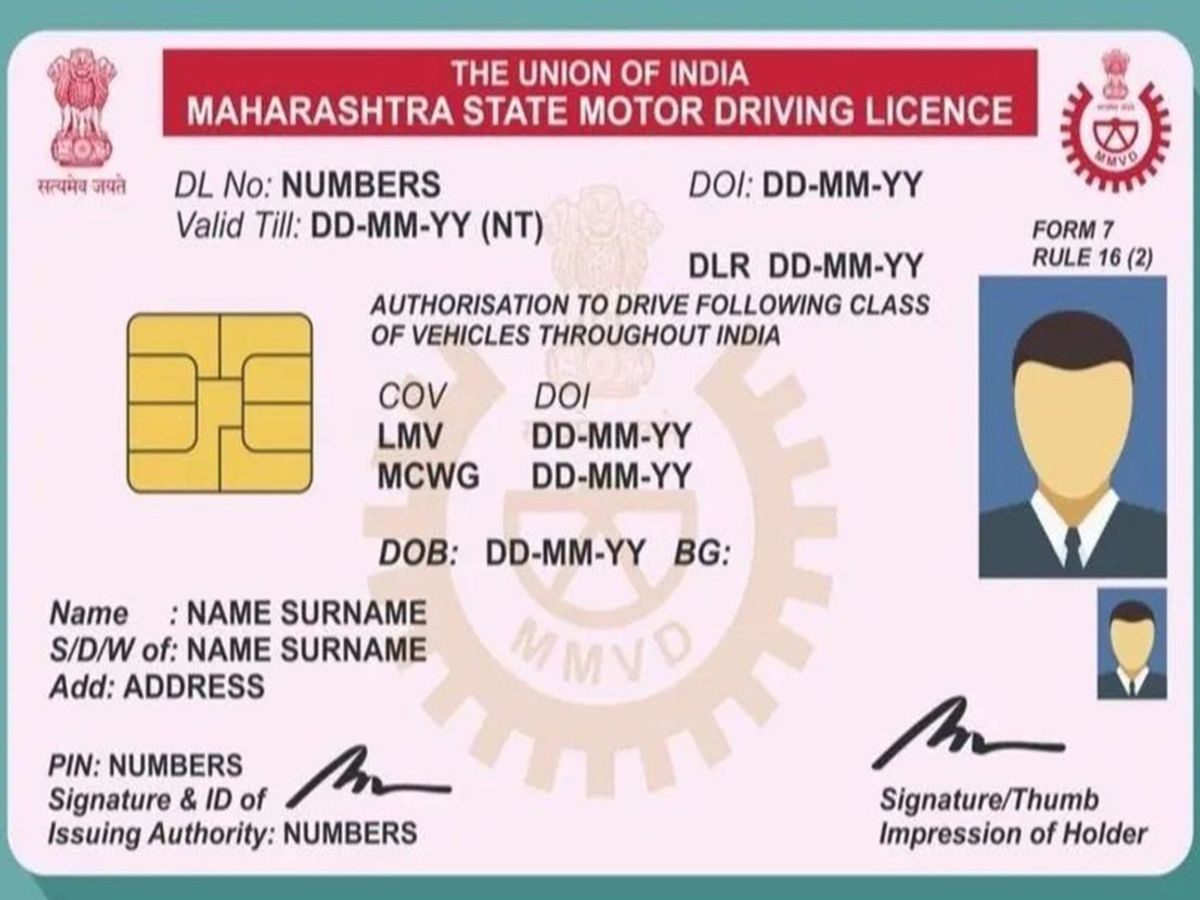

In [30]:
Image('license4.jpg')

In [32]:
output=reader.readtext('license4.jpg')

In [33]:
output

[([[447, 53], [753, 53], [753, 91], [447, 91]],
  'THE UNION OF INDIA',
  0.9928423240878184),
 ([[181, 87], [1019, 87], [1019, 131], [181, 131]],
  'MAHARASHTRA STATE MOTOR DRIVING LICENCE',
  0.9464399526073101),
 ([[32, 172], [130, 172], [130, 198], [32, 198]],
  'Hama W',
  0.2291207958434753),
 ([[169, 163], [447, 163], [447, 205], [169, 205]],
  'DL No: NUMBERS',
  0.826981997267458),
 ([[685, 165], [929, 165], [929, 203], [685, 203]],
  'DOI: DD-MM-YY',
  0.9431922826629021),
 ([[170, 202], [550, 202], [550, 250], [170, 250]],
  'Valid Till: DD-MM-YY (NT)',
  0.9130739026936286),
 ([[1028, 214], [1118, 214], [1118, 244], [1028, 244]],
  'FORM 7',
  0.9989218468743263),
 ([[685, 247], [928, 247], [928, 285], [685, 285]],
  'DLR DD-MM-YY',
  0.800018481048224),
 ([[1028, 242], [1160, 242], [1160, 274], [1028, 274]],
  'RULE 16 (2)',
  0.9258772526672258),
 ([[368, 288], [936, 288], [936, 320], [368, 320]],
  'AUTHORISATION TO DRIVE FOLLOWING CLASS',
  0.7218183234751065),
 ([[368,

In [34]:
len(output)

31

___________________________PICKING TEXT FROM OUTPUT___________________________

In [38]:
my_text=[]
for x in range(0,31):
    my_text.append(output[x][1])

In [39]:
my_text

['THE UNION OF INDIA',
 'MAHARASHTRA STATE MOTOR DRIVING LICENCE',
 'Hama W',
 'DL No: NUMBERS',
 'DOI: DD-MM-YY',
 'Valid Till: DD-MM-YY (NT)',
 'FORM 7',
 'DLR DD-MM-YY',
 'RULE 16 (2)',
 'AUTHORISATION TO DRIVE FOLLOWING CLASS',
 'OF VEHICLES THROUGHOUT INDIA',
 'COV',
 'DOI',
 'LMV',
 'DD-MM-YY',
 'MCWG',
 'DD-MM-YY',
 'DOB:',
 'DD-MM-YY',
 'BG:',
 'Name',
 'NAME SURNAME',
 'SIDI of: NAME SURNAME',
 'MwvQ',
 'Add: ADDRESS',
 'Ik',
 'PIN: NUMBERS',
 'Signature & ID of',
 'Signature/Thumb',
 'Issuing Authority: NUMBERS',
 'Impression of Holder']

____________________________PICKING TERMS CONTAINING COLON__________________

In [45]:
new_list=[]
i=0

for text in my_text:
    for letter in text:
        
        if letter==':':
            new_list.append(text)
            
        
        
    if text=='Name':
            new_list.append(text+':'+my_text[i+1])
            
    i=i+1
        

In [46]:
new_list

['DL No: NUMBERS',
 'DOI: DD-MM-YY',
 'Valid Till: DD-MM-YY (NT)',
 'DOB:',
 'BG:',
 'Name:NAME SURNAME',
 'SIDI of: NAME SURNAME',
 'Add: ADDRESS',
 'PIN: NUMBERS',
 'Issuing Authority: NUMBERS']

____________________________MAKING DICT FOR JSON____________________

In [47]:
my_dict={}
for x in new_list:
    i=0
    for letter in x:
        if letter==':':
            i=i+1
            
    
            
    if i==1:
        list_of_numbers=x.split(':')
        my_dict[list_of_numbers[0]]=list_of_numbers[1]
        
    else:
        list_of_numbers=x.split(':')
        my_dict[list_of_numbers[0]]=list_of_numbers[1].split(' ')[1]
        my_dict[list_of_numbers[2]]=list_of_numbers[1].split(' ')[2]
      
        

In [48]:
my_dict

{'DL No': ' NUMBERS',
 'DOI': ' DD-MM-YY',
 'Valid Till': ' DD-MM-YY (NT)',
 'DOB': '',
 'BG': '',
 'Name': 'NAME SURNAME',
 'SIDI of': ' NAME SURNAME',
 'Add': ' ADDRESS',
 'PIN': ' NUMBERS',
 'Issuing Authority': ' NUMBERS'}

In [49]:
import json

__________________________--JSON FILE-________________________

In [53]:
json_license=json.dumps(my_dict,indent=4)

print(json_license)

{
    "DL No": " NUMBERS",
    "DOI": " DD-MM-YY",
    "Valid Till": " DD-MM-YY (NT)",
    "DOB": "",
    "BG": "",
    "Name": "NAME SURNAME",
    "SIDI of": " NAME SURNAME",
    "Add": " ADDRESS",
    "PIN": " NUMBERS",
    "Issuing Authority": " NUMBERS"
}


___________________________FINDING ACCURACY OF THE RELEVANT TERMS___________________________

In [55]:
output

[([[447, 53], [753, 53], [753, 91], [447, 91]],
  'THE UNION OF INDIA',
  0.9928423240878184),
 ([[181, 87], [1019, 87], [1019, 131], [181, 131]],
  'MAHARASHTRA STATE MOTOR DRIVING LICENCE',
  0.9464399526073101),
 ([[32, 172], [130, 172], [130, 198], [32, 198]],
  'Hama W',
  0.2291207958434753),
 ([[169, 163], [447, 163], [447, 205], [169, 205]],
  'DL No: NUMBERS',
  0.826981997267458),
 ([[685, 165], [929, 165], [929, 203], [685, 203]],
  'DOI: DD-MM-YY',
  0.9431922826629021),
 ([[170, 202], [550, 202], [550, 250], [170, 250]],
  'Valid Till: DD-MM-YY (NT)',
  0.9130739026936286),
 ([[1028, 214], [1118, 214], [1118, 244], [1028, 244]],
  'FORM 7',
  0.9989218468743263),
 ([[685, 247], [928, 247], [928, 285], [685, 285]],
  'DLR DD-MM-YY',
  0.800018481048224),
 ([[1028, 242], [1160, 242], [1160, 274], [1028, 274]],
  'RULE 16 (2)',
  0.9258772526672258),
 ([[368, 288], [936, 288], [936, 320], [368, 320]],
  'AUTHORISATION TO DRIVE FOLLOWING CLASS',
  0.7218183234751065),
 ([[368,

_______________________DICT OF ACCURACY OF ALL TERMS________________________________

In [57]:
output_dict={}
for x in range(0,31):
    output_dict[output[x][1]]=output[x][2]

In [58]:
output_dict

{'THE UNION OF INDIA': 0.9928423240878184,
 'MAHARASHTRA STATE MOTOR DRIVING LICENCE': 0.9464399526073101,
 'Hama W': 0.2291207958434753,
 'DL No: NUMBERS': 0.826981997267458,
 'DOI: DD-MM-YY': 0.9431922826629021,
 'Valid Till: DD-MM-YY (NT)': 0.9130739026936286,
 'FORM 7': 0.9989218468743263,
 'DLR DD-MM-YY': 0.800018481048224,
 'RULE 16 (2)': 0.9258772526672258,
 'AUTHORISATION TO DRIVE FOLLOWING CLASS': 0.7218183234751065,
 'OF VEHICLES THROUGHOUT INDIA': 0.8290336158355232,
 'COV': 0.6119138102027435,
 'DOI': 0.8506807941725018,
 'LMV': 0.9927870017680684,
 'DD-MM-YY': 0.9783616989072964,
 'MCWG': 0.9999464154243469,
 'DOB:': 0.9996404647827148,
 'BG:': 0.9878634479033168,
 'Name': 0.9999301433563232,
 'NAME SURNAME': 0.9844387492721048,
 'SIDI of: NAME SURNAME': 0.5786902990231587,
 'MwvQ': 0.08354460448026657,
 'Add: ADDRESS': 0.9889567707769015,
 'Ik': 0.07544201851122034,
 'PIN: NUMBERS': 0.9762563619318745,
 'Signature & ID of': 0.8128792549917183,
 'Signature/Thumb': 0.890308

_______________________DICT OF ACCURACY OF ALL RELEVANT TERMS__________________________

In [59]:
accuracy_dict={}
i=0

for text in my_text:
    for letter in text:
        
        if letter==':':
            accuracy_dict[text]=output_dict[text]
            
        
        
    if text=='Name' or text=='NAME SURNAME':
            accuracy_dict[text]=output_dict[text]
            
    i=i+1
        

In [60]:
accuracy_dict

{'DL No: NUMBERS': 0.826981997267458,
 'DOI: DD-MM-YY': 0.9431922826629021,
 'Valid Till: DD-MM-YY (NT)': 0.9130739026936286,
 'DOB:': 0.9996404647827148,
 'BG:': 0.9878634479033168,
 'Name': 0.9999301433563232,
 'NAME SURNAME': 0.9844387492721048,
 'SIDI of: NAME SURNAME': 0.5786902990231587,
 'Add: ADDRESS': 0.9889567707769015,
 'PIN: NUMBERS': 0.9762563619318745,
 'Issuing Authority: NUMBERS': 0.7968963777916902}

_____________________________________JSON FILE OF ACCURACY______________________

In [62]:
json_accuracy_score_relevant_terms=json.dumps(accuracy_dict,indent=4)

In [63]:
print(json_accuracy_score_relevant_terms)

{
    "DL No: NUMBERS": 0.826981997267458,
    "DOI: DD-MM-YY": 0.9431922826629021,
    "Valid Till: DD-MM-YY (NT)": 0.9130739026936286,
    "DOB:": 0.9996404647827148,
    "BG:": 0.9878634479033168,
    "Name": 0.9999301433563232,
    "NAME SURNAME": 0.9844387492721048,
    "SIDI of: NAME SURNAME": 0.5786902990231587,
    "Add: ADDRESS": 0.9889567707769015,
    "PIN: NUMBERS": 0.9762563619318745,
    "Issuing Authority: NUMBERS": 0.7968963777916902
}
